In [1]:
import pandas as pd
#from sklearn.model_selection import train_test_split
import numpy as np 

#from keras import layers
#from keras import models
#from keras import backend as K
#from keras import callbacks
#from keras import optimizers
#from keras.regularizers import l2
#import pickle
#import tensorflow as tf

In [2]:

columns = ['Cluster_isCSC', 'Cluster_Size', 'Cluster_match_gLLP', 'Cluster_Time', 'Cluster_NRechitChamberPlus11', 'Cluster_NRechitChamberMinus11', 'Cluster_NRechitChamberPlus12', \
           'Cluster_NRechitChamberMinus12', 'Cluster_TimeSpread', 'Cluster_MuonVetoPt', 'Cluster_MuonVetoGlobal', 'Cluster_JetVetoLooseId', 'Cluster_JetVetoTightId', \
           'Cluster_JetVetoPt', 'Cluster_nXY', 'Cluster_nZ', \
           'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_MajorAxis', 'Cluster_MinorAxis', \
           'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'Cluster_match_RPCBx_dPhi0p5', 'frac_s1', \
           'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3']


signal = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/signal.txt', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')
pu = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/pu.txt', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')
pions_kaons = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/pions_kaons.txt', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')
dy = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/DY.txt', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')

signal["Cluster_match_gLLP"] = signal["Cluster_match_gLLP"].astype(int)
signal["Cluster_MuonVetoGlobal"] = signal["Cluster_MuonVetoGlobal"].astype(int)
signal["Cluster_JetVetoLooseId"] = signal["Cluster_JetVetoLooseId"].astype(int)
signal["Cluster_JetVetoTightId"] = signal["Cluster_JetVetoTightId"].astype(int)


pu["Cluster_match_gLLP"] =pu["Cluster_match_gLLP"].astype(int)
pu["Cluster_MuonVetoGlobal"] =pu["Cluster_MuonVetoGlobal"].astype(int)
pu["Cluster_JetVetoLooseId"] = pu["Cluster_JetVetoLooseId"].astype(int)
pu["Cluster_JetVetoTightId"] = pu["Cluster_JetVetoTightId"].astype(int)

pions_kaons["Cluster_match_gLLP"] =pions_kaons["Cluster_match_gLLP"].astype(int)
pions_kaons["Cluster_MuonVetoGlobal"] =pions_kaons["Cluster_MuonVetoGlobal"].astype(int)
pions_kaons["Cluster_JetVetoLooseId"] = pions_kaons["Cluster_JetVetoLooseId"].astype(int)
pions_kaons["Cluster_JetVetoTightId"] = pions_kaons["Cluster_JetVetoTightId"].astype(int)

dy["Cluster_match_gLLP"] =dy["Cluster_match_gLLP"].astype(int)
dy["Cluster_MuonVetoGlobal"] =dy["Cluster_MuonVetoGlobal"].astype(int)
dy["Cluster_JetVetoLooseId"] = dy["Cluster_JetVetoLooseId"].astype(int)
dy["Cluster_JetVetoTightId"] = dy["Cluster_JetVetoTightId"].astype(int)

In [3]:

print(signal.shape)
print(pu.shape)
print(pions_kaons.shape)
print(dy.shape)

(1956486, 37)
(3332951, 37)
(7350322, 37)
(1963692, 37)


In [4]:
# CSC!

# default
print('default', signal.shape)

# csc
signal = signal[(signal.Cluster_isCSC == 1)]
print('csc clusters', signal.shape)

# signal: clusters matched with gen LLP particles
signal = signal[(signal.Cluster_match_gLLP == 1)]
print('Signal gen matched: ', signal.shape)

#in time
signal = signal[(signal.Cluster_Time > -5.0) & (signal.Cluster_Time < 12.5)]
print('signal IT showers: ', signal.shape)

#ME11/12 veto
signal = signal[(signal.Cluster_NRechitChamberPlus11 == 0) & (signal.Cluster_NRechitChamberMinus11 == 0) & (signal.Cluster_NRechitChamberPlus12 == 0) & (signal.Cluster_NRechitChamberMinus12 == 0)]
print('signal veto ME11/ME12: ', signal.shape)

signal = signal[(signal.Cluster_JetVetoLooseId == 0)]
print(' jet veto: ', signal.shape)

default (1956486, 37)
csc clusters (1956486, 37)
Signal gen matched:  (1413334, 37)
signal IT showers:  (1306471, 37)
signal veto ME11/ME12:  (621290, 37)
 jet veto:  (606945, 37)


In [5]:
# CSC!
# default
print('default', pu.shape)

pu = pu[(pu.Cluster_isCSC == 1)]
print('csc clusters', pu.shape)

#in time
pu = pu[(pu.Cluster_Time > -5.0) & (pu.Cluster_Time < 12.5)]
print('pu IT showers: ', pu.shape)

#ME11/12 veto
pu = pu[(pu.Cluster_NRechitChamberPlus11 == 0) & (pu.Cluster_NRechitChamberMinus11 == 0) & (pu.Cluster_NRechitChamberPlus12 == 0) & (pu.Cluster_NRechitChamberMinus12 == 0)]
print('pu veto ME11/ME12: ', pu.shape)

#jet veto
pu = pu[(pu.Cluster_JetVetoLooseId == 0)]
print('pu jet veto: ', pu.shape)

default (3332951, 37)
csc clusters (3332951, 37)
pu IT showers:  (931730, 37)
pu veto ME11/ME12:  (24293, 37)
pu jet veto:  (23532, 37)


In [6]:
# default
print('default', dy.shape)

dy = dy[(dy.Cluster_isCSC == 1)]
print('csc clusters', dy.shape)

#in time
dy = dy[(dy.Cluster_Time > -5.0) & (dy.Cluster_Time < 12.5)]
print('dy IT showers: ', dy.shape)

#ME11/12 veto
dy = dy[(dy.Cluster_NRechitChamberPlus11 == 0) & (dy.Cluster_NRechitChamberMinus11 == 0) & (dy.Cluster_NRechitChamberPlus12 == 0) & (dy.Cluster_NRechitChamberMinus12 == 0)]
print('dy veto ME11/ME12: ', dy.shape)

#Muon veto
dy = dy[(dy.Cluster_MuonVetoGlobal == 0)]
print('dy muon veto: ', dy.shape)

default (1963692, 37)
csc clusters (1963692, 37)
dy IT showers:  (1370941, 37)
dy veto ME11/ME12:  (86110, 37)
dy muon veto:  (11022, 37)


In [7]:
np.min(dy.Cluster_MuonVetoPt)

0.0

In [8]:
# default
print('default', pions_kaons.shape)

pions_kaons = pions_kaons[(pions_kaons.Cluster_isCSC == 1)]
print('csc clusters', pions_kaons.shape)

#in time
pions_kaons = pions_kaons[(pions_kaons.Cluster_Time > -5.0) & (pions_kaons.Cluster_Time < 12.5)]
print('pions_kaons IT showers: ', pions_kaons.shape)

#ME11/12 veto
pions_kaons = pions_kaons[(pions_kaons.Cluster_NRechitChamberPlus11 == 0) & (pions_kaons.Cluster_NRechitChamberMinus11 == 0) & (pions_kaons.Cluster_NRechitChamberPlus12 == 0) & (pions_kaons.Cluster_NRechitChamberMinus12 == 0)]
print('pions_kaons veto ME11/ME12: ', pions_kaons.shape)

#jet veto
pions_kaons = pions_kaons[(pions_kaons.Cluster_JetVetoLooseId == 0)]
print('pions_kaons jet veto: ', pions_kaons.shape)

default (7350322, 37)
csc clusters (7350322, 37)
pions_kaons IT showers:  (7338796, 37)
pions_kaons veto ME11/ME12:  (26115, 37)
pions_kaons jet veto:  (25226, 37)


>>> Plotting Cluster_Size histogram...
50 6181.2


<Figure size 432x288 with 0 Axes>

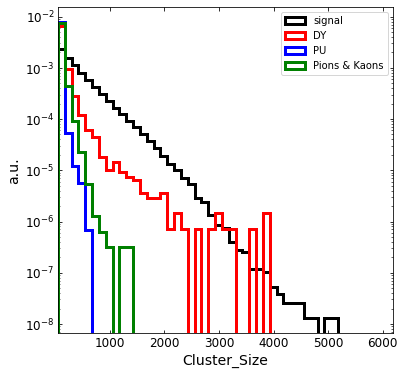

    Done
>>> Plotting Cluster_XSpread histogram...
0.00487589789554 200.1264221196


<Figure size 432x288 with 0 Axes>

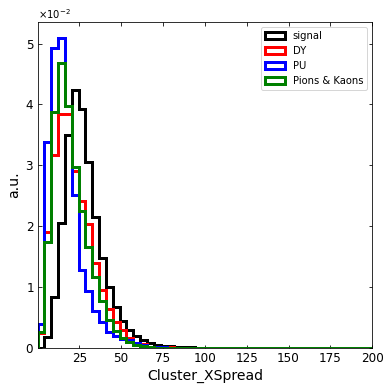

    Done
>>> Plotting Cluster_YSpread histogram...
0.871838390827 199.64335327199998


<Figure size 432x288 with 0 Axes>

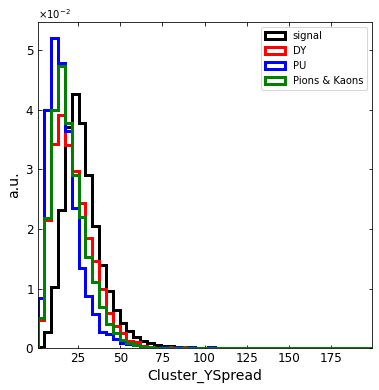

    Done
>>> Plotting Cluster_ZSpread histogram...
0.000342245126376 202.5081115728


<Figure size 432x288 with 0 Axes>

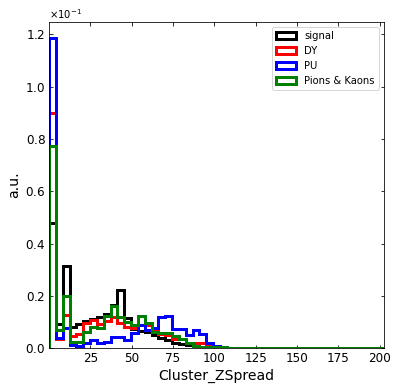

    Done
>>> Plotting Cluster_XYSpread histogram...
0.0181245468557 140.0293945308


<Figure size 432x288 with 0 Axes>

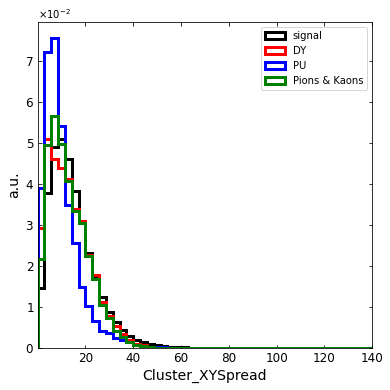

    Done
>>> Plotting Cluster_RSpread histogram...
0.121541000903 192.33213501


<Figure size 432x288 with 0 Axes>

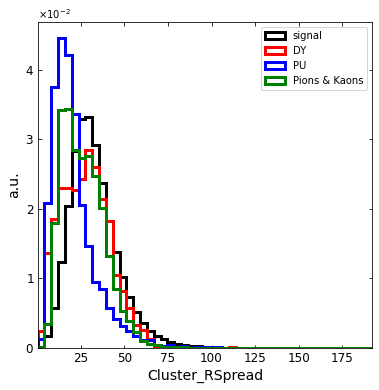

    Done
>>> Plotting Cluster_MajorAxis histogram...
0.00715150032192 0.41720187664079994


<Figure size 432x288 with 0 Axes>

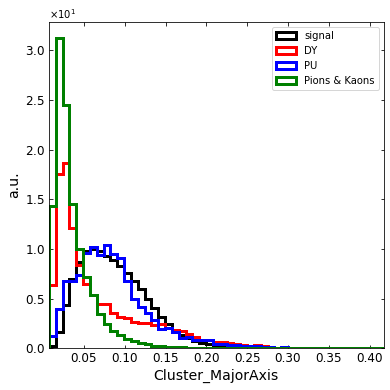

    Done
>>> Plotting Cluster_MinorAxis histogram...
9.99926924123e-05 0.27183598279919996


<Figure size 432x288 with 0 Axes>

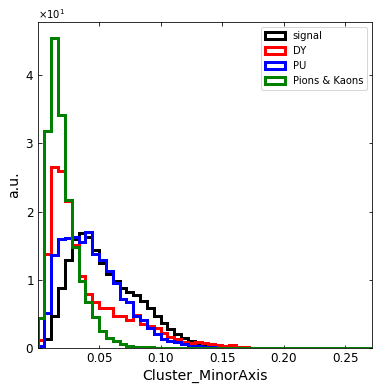

    Done
>>> Plotting Cluster_SkewX histogram...
-313.696594238 357.109936524


<Figure size 432x288 with 0 Axes>

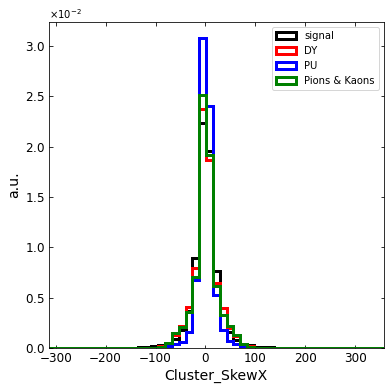

    Done
>>> Plotting Cluster_SkewY histogram...
-298.246307373 370.3890014652


<Figure size 432x288 with 0 Axes>

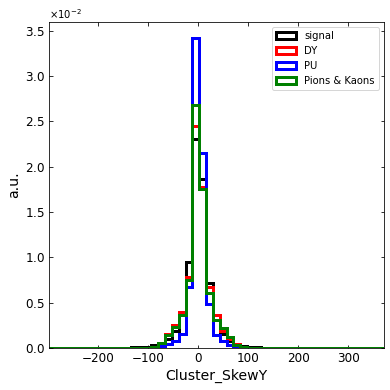

    Done
>>> Plotting Cluster_SkewZ histogram...
-330.306396484 396.7422363276


<Figure size 432x288 with 0 Axes>

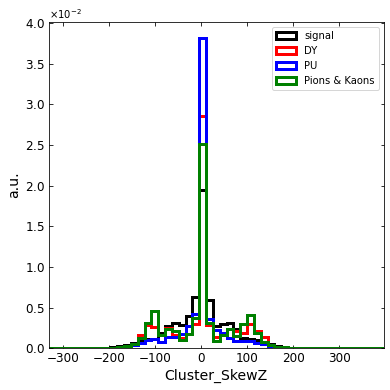

    Done
>>> Plotting Cluster_KurtX histogram...
-1.99245965481 71.57112579348


<Figure size 432x288 with 0 Axes>

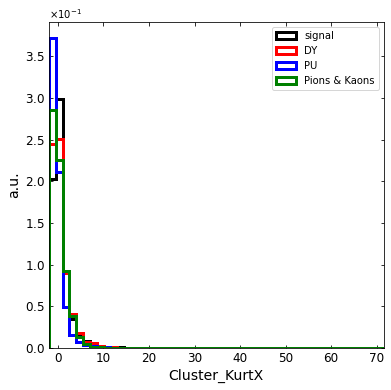

    Done
>>> Plotting Cluster_KurtY histogram...
-1.99999976158 76.77364196772


<Figure size 432x288 with 0 Axes>

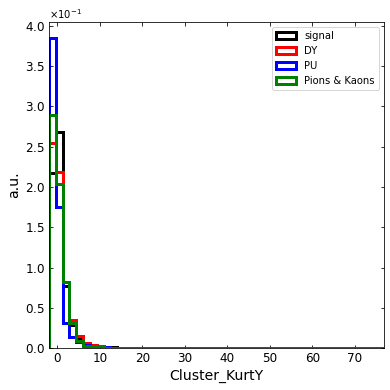

    Done
>>> Plotting frac_s1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

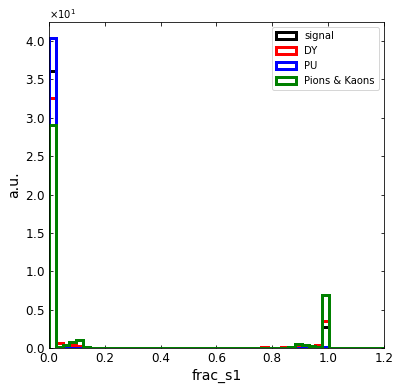

    Done
>>> Plotting frac_s2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

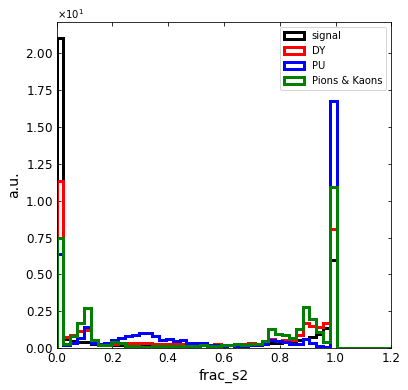

    Done
>>> Plotting frac_s3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

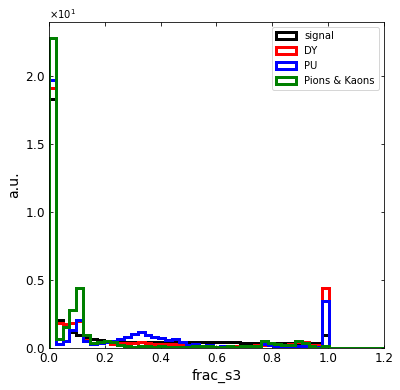

    Done
>>> Plotting frac_s4 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

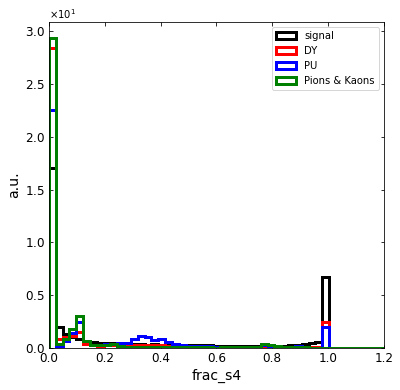

    Done
>>> Plotting frac_rw1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

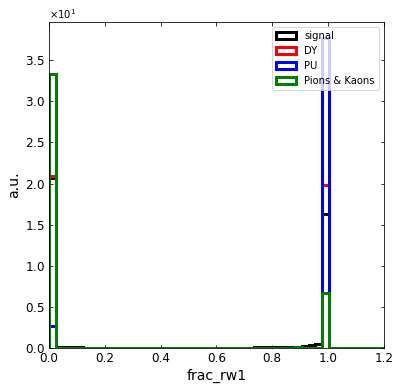

    Done
>>> Plotting frac_rw2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

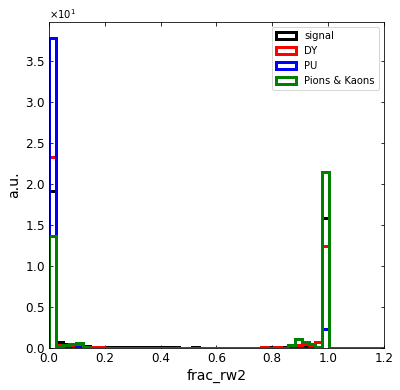

    Done
>>> Plotting frac_rw3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

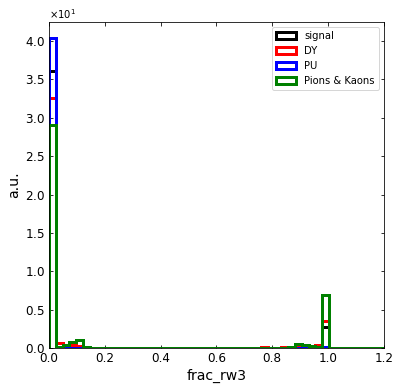

    Done


In [8]:
import matplotlib.pyplot as plt

variablesTrain = ['Cluster_Size', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_MajorAxis', 'Cluster_MinorAxis', \
           'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'frac_s1', \
           'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3']

### Loop over the features
for feature in signal[variablesTrain]:
    
    print(">>> Plotting " + feature + " histogram...")

    # Define the histogram binning
    
    xmin = signal[feature].dropna().values.min()
    xmax = 1.2*signal[feature].dropna().values.max()
    binning = np.linspace(xmin, xmax, 50) 
    print(xmin,xmax)
    
    # Plot and save the histogram
    plt.clf()
    fig = plt.figure(figsize =(6,6))
    ax = fig.add_subplot(111)
    ax.margins(x = 0)
    
    ax.hist(signal[feature].values, bins = binning, color = 'k', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'k', label = 'signal', density=True)
    ax.hist(dy[feature].values, bins = binning, color = 'r', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'r', label = 'DY', density=True)
    ax.hist(pu[feature].values, bins = binning, color = 'b', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'b', label = 'PU', density=True)
    ax.hist(pions_kaons[feature].values, bins = binning, color = 'g', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'g', label = 'Pions & Kaons', density=True)
    ax.legend(loc = 'best', fontsize = 10)
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('a.u.', fontsize = 14)
    ax.tick_params(axis='both', which='both', direction='in', 
                   bottom=True, top=True, left=True, right=True, labelsize=12)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
    if 'Size' in feature:
        plt.yscale('log')
    fig.savefig('Plots_240305_MC/CSC_'+feature+'.png', dpi = 600)
    plt.show()
          
    print("    Done")

In [9]:
columns = ['Cluster_isCSC', 'Cluster_Size', 'Cluster_match_gLLP', 'Cluster_Time', 'Cluster_eta', 'Cluster_phi', 'Cluster_NRechitChamberPlus11', 'Cluster_NRechitChamberMinus11', 'Cluster_NRechitChamberPlus12', \
           'Cluster_NRechitChamberMinus12', 'Cluster_TimeSpread', 'Cluster_MuonVetoPt', 'Cluster_MuonVetoGlobal', 'Cluster_JetVetoLooseId', 'Cluster_JetVetoTightId', \
           'Cluster_JetVetoPt', 'Cluster_nXY', 'Cluster_nZ', \
           'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_MajorAxis', 'Cluster_MinorAxis', \
           'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'Cluster_match_RPCBx_dPhi0p5', 'frac_s1', \
           'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3']

test = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/xaa', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')

test["Cluster_match_gLLP"] = test["Cluster_match_gLLP"].astype(int)
test["Cluster_MuonVetoGlobal"] = test["Cluster_MuonVetoGlobal"].astype(int)
test["Cluster_JetVetoLooseId"] = test["Cluster_JetVetoLooseId"].astype(int)
test["Cluster_JetVetoTightId"] = test["Cluster_JetVetoTightId"].astype(int)
test['y'] = 0
test['weight'] = 1.0


# default
print('default', test.shape)

test = test[(test.Cluster_isCSC == 1)]
print('csc clusters', test.shape)

#OOT time
#test = test[(test.Cluster_Time > -5.0) & (test.Cluster_Time < 12.5)]

test = test[np.logical_or(test.Cluster_Time < -5.0, test.Cluster_Time > 12.5)]
print('test OOT showers: ', test.shape)

#ME11/12 veto
test = test[(test.Cluster_NRechitChamberPlus11 == 0) & (test.Cluster_NRechitChamberMinus11 == 0) & (test.Cluster_NRechitChamberPlus12 == 0) & (test.Cluster_NRechitChamberMinus12 == 0)]
print('test veto ME11/ME12: ', test.shape)

#Muon veto
test = test[(test.Cluster_MuonVetoGlobal == 0)]
print('test muon veto: ', test.shape)

#jet veto
test = test[(test.Cluster_JetVetoLooseId == 0)]
print('test jet veto: ', test.shape)

default (10000000, 41)
csc clusters (10000000, 41)
test OOT showers:  (1430368, 41)
test veto ME11/ME12:  (355973, 41)
test muon veto:  (346729, 41)
test jet veto:  (321752, 41)


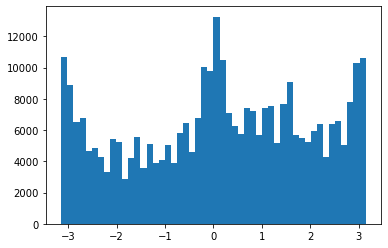

In [10]:
plt.hist(test.Cluster_phi, bins=50)
plt.show()

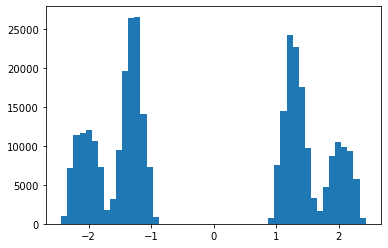

In [11]:
plt.hist(test.Cluster_eta, bins=50)
plt.show()

In [12]:
# beam halo
beam_halo = test[(test.Cluster_phi > -0.3) & (test.Cluster_phi < 0.3)]
print('beam halo: ', beam_halo.shape)
# no beam halo
nobeam_halo = test[np.logical_or(test.Cluster_phi < -0.3, test.Cluster_phi > 0.3)]
print('no beam halo: ', test.shape)


beam halo:  (47675, 41)
no beam halo:  (321752, 41)


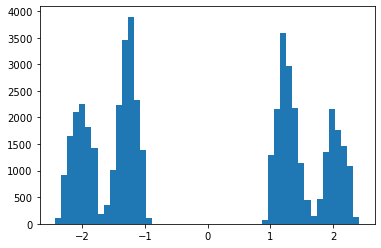

In [13]:
plt.hist(beam_halo.Cluster_eta, bins=50)
plt.show()

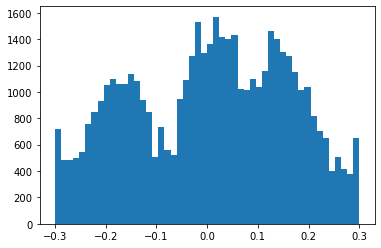

In [14]:
plt.hist(beam_halo.Cluster_phi, bins=50)
plt.show()

>>> Plotting Cluster_Size histogram...
50 6181.2


<Figure size 432x288 with 0 Axes>

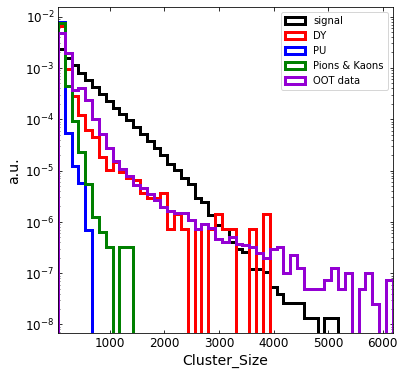

    Done
>>> Plotting Cluster_XSpread histogram...
0.00487589789554 194.91791381879997


<Figure size 432x288 with 0 Axes>

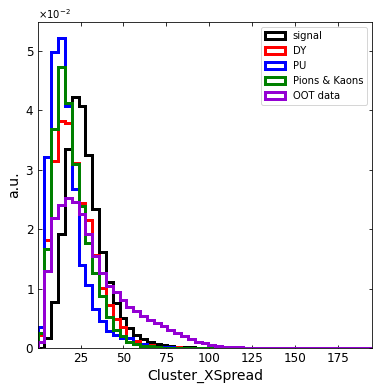

    Done
>>> Plotting Cluster_YSpread histogram...
0.871838390827 199.51087646519997


<Figure size 432x288 with 0 Axes>

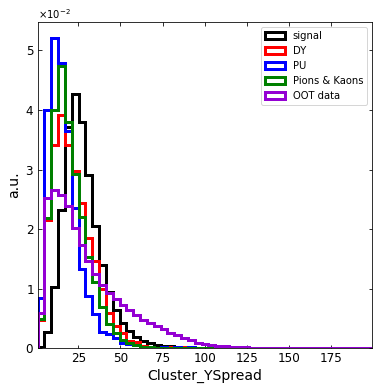

    Done
>>> Plotting Cluster_ZSpread histogram...
0.000342245126376 202.5081115728


<Figure size 432x288 with 0 Axes>

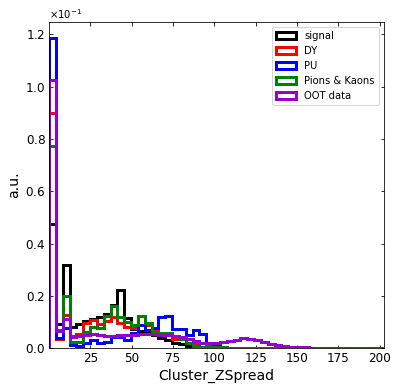

    Done
>>> Plotting Cluster_XYSpread histogram...
0.0181245468557 140.0293945308


<Figure size 432x288 with 0 Axes>

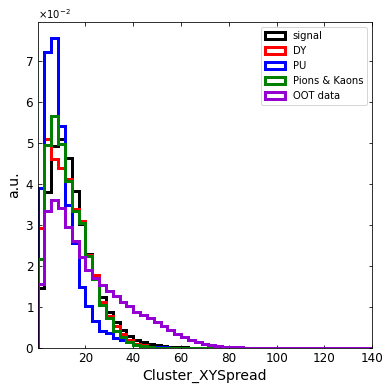

    Done
>>> Plotting Cluster_RSpread histogram...
0.121541000903 192.33213501


<Figure size 432x288 with 0 Axes>

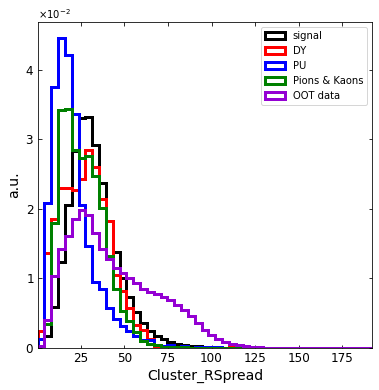

    Done
>>> Plotting Cluster_MajorAxis histogram...
0.00715150032192 0.41720187664079994


<Figure size 432x288 with 0 Axes>

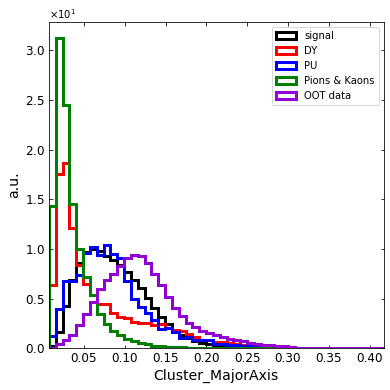

    Done
>>> Plotting Cluster_MinorAxis histogram...
9.99926924123e-05 0.27183598279919996


<Figure size 432x288 with 0 Axes>

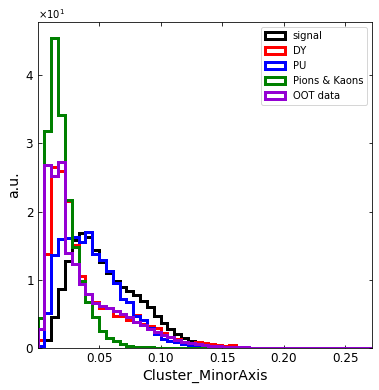

    Done
>>> Plotting Cluster_SkewX histogram...
-313.696594238 348.8370483396


<Figure size 432x288 with 0 Axes>

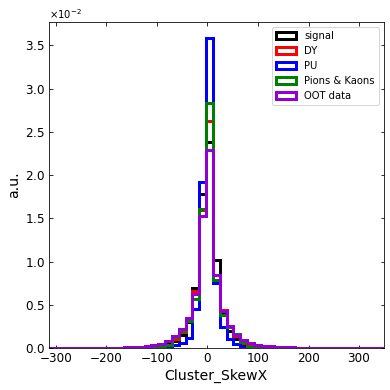

    Done
>>> Plotting Cluster_SkewY histogram...
-298.246307373 370.3890014652


<Figure size 432x288 with 0 Axes>

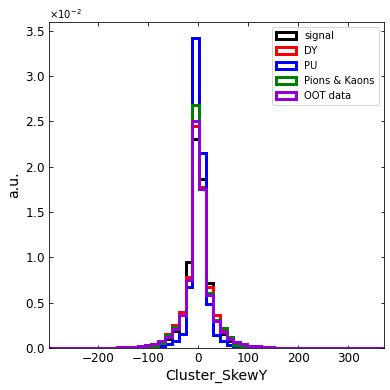

    Done
>>> Plotting Cluster_SkewZ histogram...
-330.306396484 396.7422363276


<Figure size 432x288 with 0 Axes>

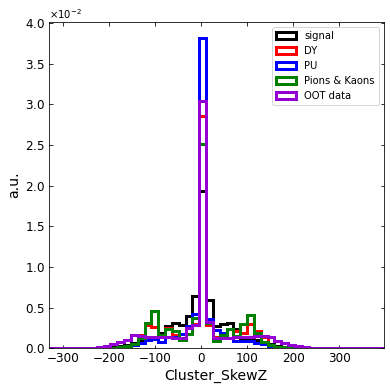

    Done
>>> Plotting Cluster_KurtX histogram...
-1.99245965481 71.57112579348


<Figure size 432x288 with 0 Axes>

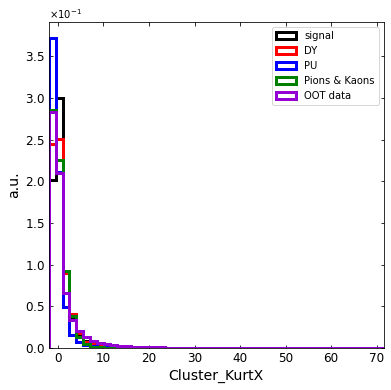

    Done
>>> Plotting Cluster_KurtY histogram...
-1.99999976158 76.77364196772


<Figure size 432x288 with 0 Axes>

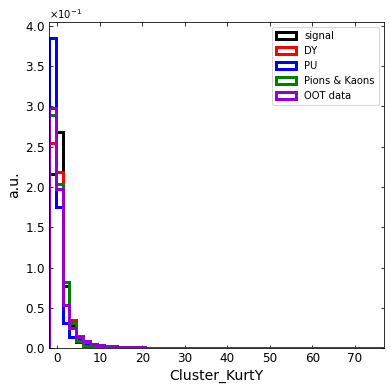

    Done
>>> Plotting Cluster_KurtZ histogram...
-2.0 2094.143408208


<Figure size 432x288 with 0 Axes>

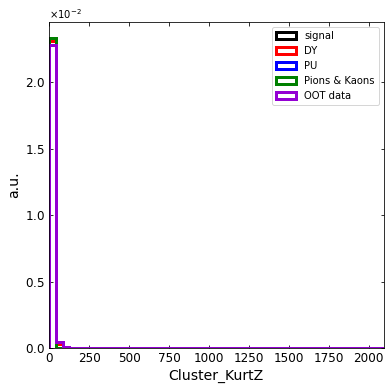

    Done
>>> Plotting frac_s1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

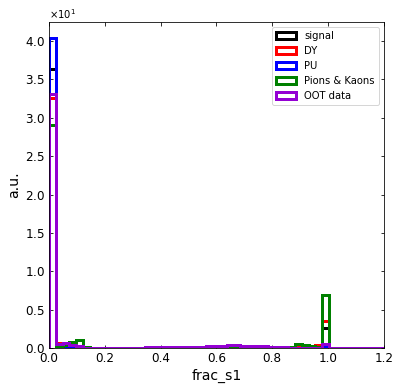

    Done
>>> Plotting frac_s2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

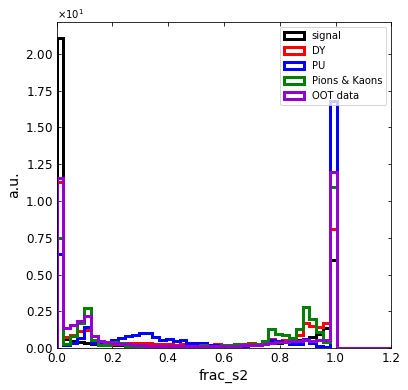

    Done
>>> Plotting frac_s3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

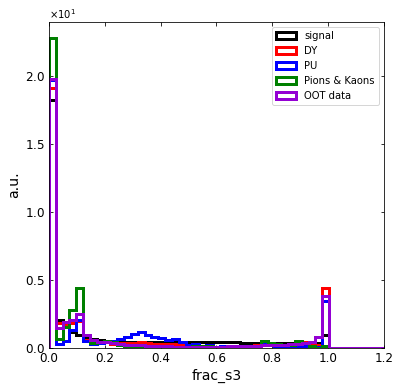

    Done
>>> Plotting frac_s4 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

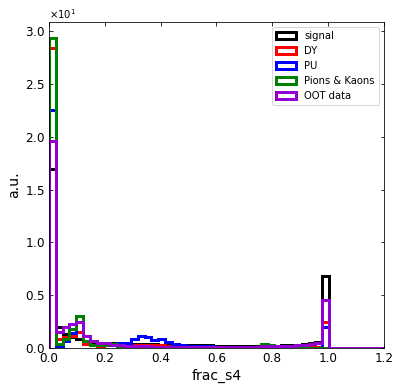

    Done
>>> Plotting frac_rw1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

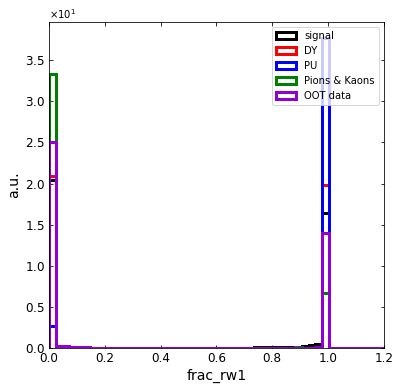

    Done
>>> Plotting frac_rw2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

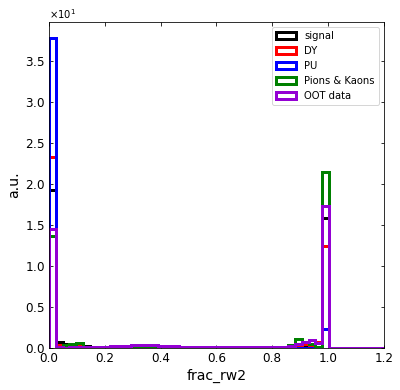

    Done
>>> Plotting frac_rw3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

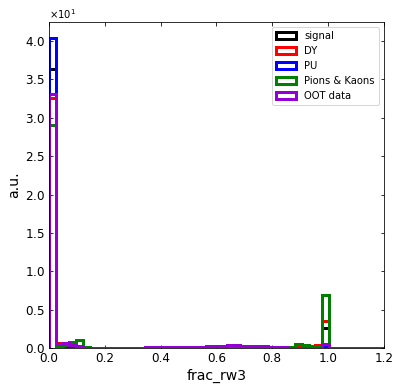

    Done


In [10]:
import matplotlib.pyplot as plt

variablesTrain = ['Cluster_Size', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_MajorAxis', 'Cluster_MinorAxis', \
           'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'frac_s1', \
           'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3']

### Loop over the features
for feature in signal[variablesTrain]:
    
    print(">>> Plotting " + feature + " histogram...")

    # Define the histogram binning
    
    xmin = signal[feature].dropna().values.min()
    xmax = 1.2*signal[feature].dropna().values.max()
    binning = np.linspace(xmin, xmax, 50) 
    print(xmin,xmax)
    
    # Plot and save the histogram
    plt.clf()
    fig = plt.figure(figsize =(6,6))
    ax = fig.add_subplot(111)
    ax.margins(x = 0)
    
    ax.hist(signal[feature].values, bins = binning, color = 'k', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'k', label = 'signal', density=True)
    ax.hist(dy[feature].values, bins = binning, color = 'r', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'r', label = 'DY', density=True)
    ax.hist(pu[feature].values, bins = binning, color = 'b', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'b', label = 'PU', density=True)
    ax.hist(pions_kaons[feature].values, bins = binning, color = 'g', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'g', label = 'Pions & Kaons', density=True)
    ax.hist(test[feature].values, bins = binning, color = 'darkviolet', alpha = 1, histtype = 'step', 
             linewidth = 3, edgecolor = 'darkviolet', label = 'OOT data', density=True)
    #ax.hist(beam_halo[feature].values, bins = binning, color = 'gold', alpha = 1, histtype = 'step', 
    #         linewidth = 3, edgecolor = 'gold', label = 'OOT data beam halo', density=True)
    ax.legend(loc = 'best', fontsize = 10)
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('a.u.', fontsize = 14)
    ax.tick_params(axis='both', which='both', direction='in', 
                   bottom=True, top=True, left=True, right=True, labelsize=12)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
    if 'Size' in feature:
        plt.yscale('log')
    fig.savefig('Plots_240305_MC_plusData/CSC_'+feature+'.png', dpi = 600)
    plt.show()
          
    print("    Done")

In [16]:
print(signal.shape)
print(dy.shape)
print(pu.shape)
print(pions_kaons.shape)
print(beam_halo.shape)
print(test.shape)


(621290, 37)
(11022, 37)
(23532, 37)
(25226, 37)
(47675, 41)
(321752, 41)


283808


(array([7373., 6857., 6655., 5984., 6002., 5564., 5235., 4882., 4652.,
        4410., 4263., 3809., 3792., 3564., 3415., 3203., 3140., 2947.,
        2902., 2801., 2587., 2428., 2452., 2243., 2271., 2057., 2023.,
        1889., 1904., 1829., 1740., 1754., 1752., 1587., 1632., 1526.,
        1477., 1461., 1408., 1511., 1458., 1433., 1386., 1372., 1459.,
        1485., 1471., 1486., 1482., 1630., 1516., 1423., 1480., 1422.,
        1409., 1366., 1260., 1172., 1199., 1190., 1149., 1029., 1065.,
        1031., 1097.,  980., 1005.,  908.,  888.,  864.,  828.,  833.,
         858.,  732.,  759.,  692.,  723.,  700.,  707.,  631.,  591.,
         593.,  568.,  594.,  545.,  524.,  519.,  528.,  479.,  498.,
         469.,  492.,  485.,  419.,  445.,  391.,  448.,  389.,  358.,
         395.,  390.,  386.,  372.,  390.,  357.,  379.,  308.,  356.,
         361.,  328.,  319.,  338.,  355.,  297.,  307.,  288.,  300.,
         308.,  331.,  299.,  363.,  326.,  364.,  327.,  396.,  371.,
      

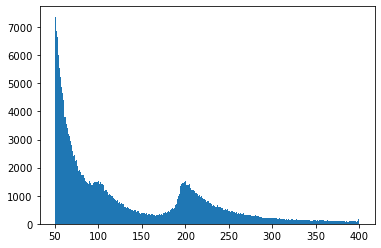

In [17]:
print(len(test[(test.Cluster_Size <= 400) & (test.Cluster_Size >= 50)]["Cluster_Size"].values)) 

import matplotlib.pyplot as plt
plt.hist(test[(test.Cluster_Size <= 400) & (test.Cluster_Size >= 50)]["Cluster_Size"], bins=350)


In [18]:
len(test[(test.Cluster_Size <= 400) & (test.Cluster_Size >= 50)]["Cluster_Size"].values)


283808

In [19]:
bins = np.array(range(50,400,1))


In [20]:
entries_test = np.array([7373., 6857., 6655., 5984., 6002., 5564., 5235., 4882., 4652.,
        4410., 4263., 3809., 3792., 3564., 3415., 3203., 3140., 2947.,
        2902., 2801., 2587., 2428., 2452., 2243., 2271., 2057., 2023.,
        1889., 1904., 1829., 1740., 1754., 1752., 1587., 1632., 1526.,
        1477., 1461., 1408., 1511., 1458., 1433., 1386., 1372., 1459.,
        1485., 1471., 1486., 1482., 1630., 1516., 1423., 1480., 1422.,
        1409., 1366., 1260., 1172., 1199., 1190., 1149., 1029., 1065.,
        1031., 1097.,  980., 1005.,  908.,  888.,  864.,  828.,  833.,
         858.,  732.,  759.,  692.,  723.,  700.,  707.,  631.,  591.,
         593.,  568.,  594.,  545.,  524.,  519.,  528.,  479.,  498.,
         469.,  492.,  485.,  419.,  445.,  391.,  448.,  389.,  358.,
         395.,  390.,  386.,  372.,  390.,  357.,  379.,  308.,  356.,
         361.,  328.,  319.,  338.,  355.,  297.,  307.,  288.,  300.,
         308.,  331.,  299.,  363.,  326.,  364.,  327.,  396.,  371.,
         367.,  410.,  382.,  403.,  450.,  428.,  478.,  472.,  516.,
         574.,  543.,  572.,  684.,  715.,  866.,  916.,  980., 1072.,
        1342., 1420., 1449., 1443., 1472., 1475., 1510., 1367., 1371.,
        1379., 1403., 1257., 1213., 1196., 1214., 1192., 1164., 1114.,
        1111., 1072., 1019.,  990., 1026.,  956.,  995.,  925.,  882.,
         882.,  869.,  862.,  783.,  820.,  800.,  746.,  735.,  745.,
         718.,  641.,  686.,  616.,  599.,  611.,  678.,  554.,  607.,
         582.,  588.,  552.,  547.,  495.,  532.,  498.,  530.,  488.,
         521.,  470.,  448.,  430.,  445.,  464.,  438.,  408.,  404.,
         376.,  416.,  354.,  354.,  397.,  341.,  369.,  352.,  347.,
         390.,  326.,  331.,  315.,  323.,  301.,  320.,  310.,  296.,
         276.,  264.,  270.,  287.,  272.,  326.,  266.,  260.,  245.,
         281.,  226.,  242.,  233.,  221.,  212.,  223.,  215.,  212.,
         215.,  202.,  216.,  203.,  199.,  226.,  218.,  206.,  212.,
         211.,  194.,  192.,  180.,  205.,  186.,  191.,  172.,  186.,
         179.,  164.,  159.,  183.,  151.,  166.,  152.,  167.,  149.,
         151.,  160.,  172.,  157.,  132.,  150.,  140.,  157.,  145.,
         118.,  136.,  125.,  140.,  140.,  143.,  139.,  134.,  128.,
         125.,  149.,  131.,  120.,  124.,   97.,  130.,  110.,  103.,
         122.,  135.,  135.,  100.,  135.,  113.,  107.,  126.,  134.,
         122.,  120.,  135.,  107.,  105.,  106.,  108.,  132.,  117.,
         104.,  107.,  112.,  117.,  104.,  117.,  103.,  115.,  114.,
         101.,   92.,  101.,  103.,   91.,   85.,   92.,   95.,   86.,
          89.,   76.,   87.,   77.,   80.,  103.,   85.,   89.,   84.,
          84.,   89.,   97.,   84.,   74.,   83.,   92.,  92.])

In [21]:
p_test = np.polyfit(bins, entries_test/283808, 15)
p_test = np.poly1d(p_test)

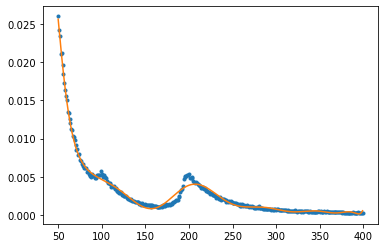

In [22]:

plt.plot(bins, entries_test/283808, '.', bins, p_test(bins), '-')


plt.show()

39720


(array([1101., 1068., 1042.,  936.,  945.,  802.,  783.,  765.,  721.,
         670.,  680.,  559.,  579.,  525.,  490.,  493.,  503.,  397.,
         452.,  451.,  416.,  379.,  356.,  342.,  319.,  317.,  296.,
         295.,  305.,  272.,  294.,  231.,  289.,  240.,  245.,  203.,
         224.,  219.,  213.,  238.,  213.,  199.,  187.,  217.,  212.,
         211.,  238.,  226.,  237.,  265.,  210.,  231.,  219.,  209.,
         229.,  219.,  192.,  180.,  177.,  180.,  184.,  138.,  158.,
         158.,  173.,  166.,  156.,  124.,  144.,  140.,  104.,  129.,
         138.,  105.,  120.,  100.,  108.,  106.,  112.,  106.,   87.,
          96.,   79.,   91.,   82.,   74.,   76.,   76.,   84.,   75.,
          74.,   69.,   54.,   66.,   68.,   61.,   86.,   53.,   60.,
          59.,   54.,   67.,   50.,   66.,   72.,   37.,   42.,   62.,
          59.,   45.,   61.,   58.,   43.,   44.,   56.,   52.,   38.,
          44.,   47.,   42.,   51.,   43.,   47.,   39.,   50.,   55.,
      

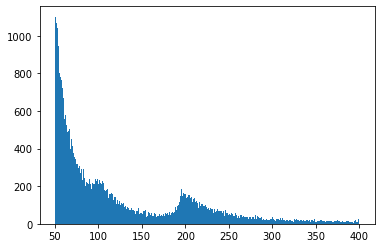

In [23]:
print(len(beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]["Cluster_Size"].values)) 

import matplotlib.pyplot as plt
plt.hist(beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]["Cluster_Size"], bins=350)



In [24]:
len(beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]["Cluster_Size"].values)


39720

In [25]:
bins = np.array(range(50,400,1))


In [26]:
entries_beam_halo = np.array([1101., 1068., 1042.,  936.,  945.,  802.,  783.,  765.,  721.,
         670.,  680.,  559.,  579.,  525.,  490.,  493.,  503.,  397.,
         452.,  451.,  416.,  379.,  356.,  342.,  319.,  317.,  296.,
         295.,  305.,  272.,  294.,  231.,  289.,  240.,  245.,  203.,
         224.,  219.,  213.,  238.,  213.,  199.,  187.,  217.,  212.,
         211.,  238.,  226.,  237.,  265.,  210.,  231.,  219.,  209.,
         229.,  219.,  192.,  180.,  177.,  180.,  184.,  138.,  158.,
         158.,  173.,  166.,  156.,  124.,  144.,  140.,  104.,  129.,
         138.,  105.,  120.,  100.,  108.,  106.,  112.,  106.,   87.,
          96.,   79.,   91.,   82.,   74.,   76.,   76.,   84.,   75.,
          74.,   69.,   54.,   66.,   68.,   61.,   86.,   53.,   60.,
          59.,   54.,   67.,   50.,   66.,   72.,   37.,   42.,   62.,
          59.,   45.,   61.,   58.,   43.,   44.,   56.,   52.,   38.,
          44.,   47.,   42.,   51.,   43.,   47.,   39.,   50.,   55.,
          44.,   55.,   54.,   57.,   49.,   63.,   46.,   52.,   58.,
          62.,   57.,   61.,   90.,   75.,   94.,  107.,  102.,  117.,
         146.,  185.,  148.,  166.,  181.,  159.,  158.,  135.,  145.,
         155.,  151.,  135.,  131.,  143.,  116.,  130.,  135.,  117.,
         121.,  111.,  117.,   86.,  116.,   93.,  105.,  104.,   96.,
         100.,   93.,   99.,   91.,   81.,   84.,   74.,   85.,   76.,
          79.,   80.,   58.,   80.,   65.,   70.,   79.,   57.,   66.,
          69.,   69.,   68.,   60.,   68.,   74.,   42.,   74.,   56.,
          55.,   45.,   50.,   49.,   62.,   58.,   50.,   40.,   42.,
          55.,   48.,   29.,   43.,   40.,   33.,   47.,   46.,   34.,
          39.,   36.,   35.,   35.,   36.,   37.,   28.,   35.,   37.,
          30.,   24.,   36.,   35.,   26.,   49.,   24.,   42.,   37.,
          34.,   30.,   29.,   35.,   19.,   27.,   30.,   21.,   22.,
          27.,   22.,   22.,   18.,   26.,   27.,   25.,   34.,   23.,
          20.,   16.,   25.,   25.,   21.,   25.,   20.,   31.,   20.,
          31.,   19.,   13.,   20.,   14.,   18.,   20.,   17.,   20.,
          21.,   18.,   17.,   16.,   11.,   23.,   18.,   23.,   20.,
          18.,   21.,   16.,   18.,   22.,   17.,   19.,   20.,   14.,
          17.,   18.,   18.,   17.,   18.,    7.,   17.,   20.,   19.,
          14.,   26.,   11.,   12.,   17.,   17.,   15.,   15.,   22.,
          21.,   15.,   16.,   21.,   17.,   11.,   15.,   15.,   14.,
          16.,   15.,   11.,   17.,   10.,   12.,   14.,   17.,   16.,
          20.,    8.,   16.,   15.,    7.,   12.,   13.,   10.,   12.,
          11.,    7.,   13.,   14.,   17.,   11.,   12.,   14.,   10.,
          11.,    6.,   15.,   19.,    8.,   11.,   13.,   13.])

In [27]:
p_beam_halo = np.polyfit(bins, entries_beam_halo/39720, 10)
p_beam_halo = np.poly1d(p_beam_halo)

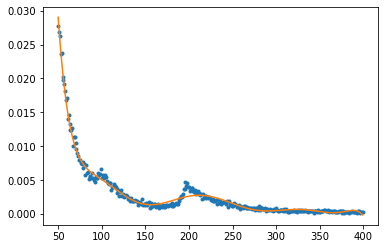

In [28]:

plt.plot(bins, entries_beam_halo/39720, '.', bins, p_beam_halo(bins), '-')


plt.show()


376009


(array([2284., 2229., 2145., 1937., 2620., 2041., 1971., 2237., 2013.,
        1818., 2344., 1888., 1822., 1987., 1952., 1744., 1945., 1811.,
        1793., 1812., 1831., 1741., 1922., 1718., 1801., 1727., 1659.,
        1652., 1747., 1644., 1685., 1702., 1618., 1544., 1685., 1586.,
        1576., 1489., 1581., 1599., 1569., 1473., 1586., 1557., 1524.,
        1487., 1650., 1383., 1439., 1424., 1519., 1462., 1401., 1360.,
        1457., 1439., 1380., 1416., 1486., 1380., 1358., 1362., 1417.,
        1472., 1412., 1331., 1383., 1348., 1371., 1358., 1272., 1263.,
        1392., 1284., 1309., 1309., 1304., 1342., 1317., 1287., 1254.,
        1242., 1256., 1224., 1291., 1252., 1332., 1271., 1277., 1217.,
        1255., 1231., 1196., 1261., 1307., 1235., 1229., 1133., 1235.,
        1204., 1245., 1164., 1203., 1089., 1226., 1213., 1209., 1168.,
        1131., 1190., 1175., 1136., 1092., 1141., 1162., 1156., 1086.,
        1144., 1191., 1064., 1181., 1135., 1148., 1143., 1118., 1071.,
      

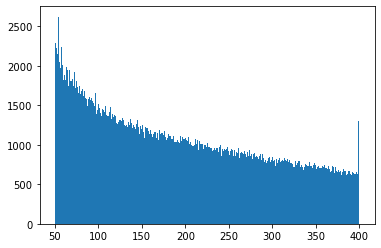

In [29]:
print(len(signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]["Cluster_Size"].values)) 

import matplotlib.pyplot as plt
plt.hist(signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]["Cluster_Size"], bins=350)



In [30]:
len(signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]["Cluster_Size"].values)


376009

In [31]:
entries_signal = np.array([2284., 2229., 2145., 1937., 2620., 2041., 1971., 2237., 2013.,
        1818., 2344., 1888., 1822., 1987., 1952., 1744., 1945., 1811.,
        1793., 1812., 1831., 1741., 1922., 1718., 1801., 1727., 1659.,
        1652., 1747., 1644., 1685., 1702., 1618., 1544., 1685., 1586.,
        1576., 1489., 1581., 1599., 1569., 1473., 1586., 1557., 1524.,
        1487., 1650., 1383., 1439., 1424., 1519., 1462., 1401., 1360.,
        1457., 1439., 1380., 1416., 1486., 1380., 1358., 1362., 1417.,
        1472., 1412., 1331., 1383., 1348., 1371., 1358., 1272., 1263.,
        1392., 1284., 1309., 1309., 1304., 1342., 1317., 1287., 1254.,
        1242., 1256., 1224., 1291., 1252., 1332., 1271., 1277., 1217.,
        1255., 1231., 1196., 1261., 1307., 1235., 1229., 1133., 1235.,
        1204., 1245., 1164., 1203., 1089., 1226., 1213., 1209., 1168.,
        1131., 1190., 1175., 1136., 1092., 1141., 1162., 1156., 1086.,
        1144., 1191., 1064., 1181., 1135., 1148., 1143., 1118., 1071.,
        1180., 1096., 1058., 1083., 1141., 1106., 1109., 1110., 1078.,
        1077., 1113., 1033., 1032., 1032., 1056., 1072., 1039., 1019.,
        1108., 1045., 1098., 1073., 1027., 1068., 1088., 1059., 1053.,
        1096., 1015., 1036., 1045.,  993.,  989.,  983., 1001., 1067.,
        1009., 1057.,  933.,  929., 1050., 1013., 1015., 1008.,  947.,
         971.,  991.,  991.,  969., 1017.,  977.,  967.,  958.,  897.,
         965.,  927.,  928.,  963.,  931.,  961.,  954.,  965.,  913.,
         973.,  991.,  855.,  949.,  915.,  948.,  949.,  932.,  944.,
         966.,  918.,  874.,  923.,  959.,  941.,  937.,  857.,  929.,
         854.,  905.,  894.,  869.,  964.,  836.,  902.,  912.,  900.,
         880.,  871.,  922.,  884.,  849.,  911.,  853.,  938.,  856.,
         903.,  879.,  817.,  884.,  890.,  841.,  853.,  843.,  788.,
         817.,  856.,  878.,  812.,  880.,  830.,  862.,  784.,  805.,
         765.,  795.,  836.,  845.,  781.,  781.,  808.,  846.,  798.,
         805.,  725.,  816.,  766.,  786.,  802.,  838.,  778.,  792.,
         807.,  795.,  763.,  827.,  809.,  789.,  825.,  785.,  803.,
         773.,  769.,  775.,  760.,  721.,  720.,  797.,  739.,  765.,
         751.,  790.,  798.,  719.,  744.,  719.,  686.,  754.,  724.,
         752.,  740.,  733.,  725.,  784.,  731.,  730.,  728.,  703.,
         738.,  766.,  749.,  693.,  716.,  770.,  727.,  710.,  701.,
         702.,  731.,  720.,  736.,  742.,  708.,  702.,  687.,  729.,
         695.,  659.,  651.,  672.,  726.,  713.,  639.,  721.,  665.,
         650.,  667.,  676.,  650.,  666.,  623.,  661.,  696.,  664.,
         667.,  670.,  623.,  628.,  672.,  672.,  624.,  659.,  614.,
         656.,  642.,  635.,  628.,  661.,  635.,  669., 669.])

In [32]:
bins = np.array(range(50,400,1))
#bins = np.delete(bins, -1)
#entries_CscBkg = np.delete(entries_CscBkg, -1)

In [33]:
p_signal = np.polyfit(bins, entries_signal/376009, 10)
p_signal = np.poly1d(p_signal)

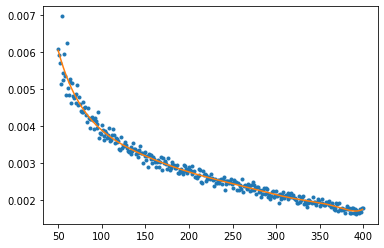

In [34]:

plt.plot(bins, entries_signal/376009, '.', bins, p_signal(bins), '-')


plt.show()


10531


(array([342., 272., 278., 264., 267., 232., 240., 195., 205., 163., 211.,
        164., 181., 177., 161., 150., 129., 147., 126., 118., 133., 111.,
        126., 104., 116., 116., 101.,  80.,  96.,  91.,  82.,  67.,  73.,
         82.,  73.,  81.,  79.,  69.,  65.,  75.,  79.,  66.,  67.,  62.,
         59.,  48.,  57.,  45.,  58.,  57.,  64.,  50.,  48.,  44.,  44.,
         54.,  54.,  42.,  56.,  44.,  55.,  44.,  43.,  53.,  37.,  39.,
         34.,  47.,  39.,  33.,  33.,  42.,  40.,  36.,  37.,  48.,  35.,
         37.,  34.,  28.,  25.,  30.,  28.,  30.,  36.,  30.,  35.,  23.,
         29.,  31.,  24.,  29.,  25.,  25.,  21.,  21.,  25.,  24.,  17.,
         14.,  24.,  19.,  28.,  20.,  28.,  30.,  29.,  25.,  20.,  29.,
         26.,  15.,  27.,  19.,  25.,  29.,  29.,  23.,  20.,  23.,  23.,
         16.,  28.,  26.,  30.,  20.,  18.,  15.,  18.,  21.,  19.,  17.,
         21.,  16.,  18.,  23.,  11.,  21.,  20.,  17.,  19.,  15.,  16.,
         12.,  19.,  18.,  22.,  18., 

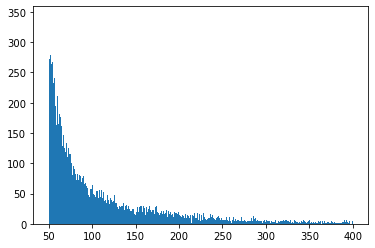

In [35]:
# # BKG DT

print(len(dy[(dy.Cluster_Size <= 400) & (dy.Cluster_Size >= 50)]["Cluster_Size"].values))

plt.hist(dy[(dy.Cluster_Size <= 400) & (dy.Cluster_Size >= 50)]["Cluster_Size"], bins=350)


In [36]:
entries_dy = np.array([342., 272., 278., 264., 267., 232., 240., 195., 205., 163., 211.,
        164., 181., 177., 161., 150., 129., 147., 126., 118., 133., 111.,
        126., 104., 116., 116., 101.,  80.,  96.,  91.,  82.,  67.,  73.,
         82.,  73.,  81.,  79.,  69.,  65.,  75.,  79.,  66.,  67.,  62.,
         59.,  48.,  57.,  45.,  58.,  57.,  64.,  50.,  48.,  44.,  44.,
         54.,  54.,  42.,  56.,  44.,  55.,  44.,  43.,  53.,  37.,  39.,
         34.,  47.,  39.,  33.,  33.,  42.,  40.,  36.,  37.,  48.,  35.,
         37.,  34.,  28.,  25.,  30.,  28.,  30.,  36.,  30.,  35.,  23.,
         29.,  31.,  24.,  29.,  25.,  25.,  21.,  21.,  25.,  24.,  17.,
         14.,  24.,  19.,  28.,  20.,  28.,  30.,  29.,  25.,  20.,  29.,
         26.,  15.,  27.,  19.,  25.,  29.,  29.,  23.,  20.,  23.,  23.,
         16.,  28.,  26.,  30.,  20.,  18.,  15.,  18.,  21.,  19.,  17.,
         21.,  16.,  18.,  23.,  11.,  21.,  20.,  17.,  19.,  15.,  16.,
         12.,  19.,  18.,  22.,  18.,  16.,  20.,  15.,  13.,  12.,  13.,
         14.,  13.,   9.,  16.,  10.,  14.,  13.,  10.,  10.,  14.,   2.,
         15.,  13.,  18.,   9.,  12.,  10.,  18.,   6.,  17.,   5.,  15.,
         14.,   7.,  18.,  11.,   8.,   7.,   8.,  10.,  10.,  10.,  16.,
         11.,  15.,   9.,   8.,   7.,   9.,  10.,  11.,  13.,   9.,   7.,
          9.,  10.,   7.,   7.,   7.,   6.,  11.,   7.,   5.,  10.,  12.,
          4.,   2.,   6.,  11.,   4.,   8.,   8.,   5.,   7.,   7.,   5.,
          4.,  12.,   5.,   5.,   4.,   6.,   5.,   3.,   4.,   4.,   1.,
          5.,   5.,  10.,   4.,  13.,   8.,  10.,  12.,   4.,   6.,   5.,
          5.,   5.,   4.,   6.,   2.,   5.,   7.,   3.,   6.,   4.,   5.,
          9.,   5.,   2.,   4.,   3.,   3.,   3.,   6.,   2.,   2.,   2.,
          5.,   3.,   4.,   4.,   9.,   4.,   7.,   4.,   6.,   7.,   4.,
          5.,   6.,   3.,   7.,   2.,   3.,   2.,   6.,   5.,   1.,   3.,
          3.,   2.,   3.,   1.,   5.,   4.,   3.,   6.,   5.,   3.,   2.,
          3.,   4.,   5.,   7.,   2.,   3.,   1.,   3.,   2.,   3.,   5.,
          1.,   2.,   5.,   3.,   5.,   0.,   6.,   5.,   1.,   4.,   2.,
          1.,   3.,   3.,   4.,   1.,   1.,   5.,   3.,   2.,   3.,   1.,
          2.,   1.,   1.,   2.,   2.,   1.,   2.,   1.,   3.,   3.,   6.,
          3.,   6.,   3.,   2.,   2.,   4.,   0.,   0.,   0.])

In [37]:
bins = np.array(range(50,400,1))
#bins = np.delete(bins, -1)
#entries_DtBkg = np.delete(entries_DtBkg, -1)

p_dy = np.polyfit(bins, entries_dy/10531, 10)
p_dy = np.poly1d(p_dy)

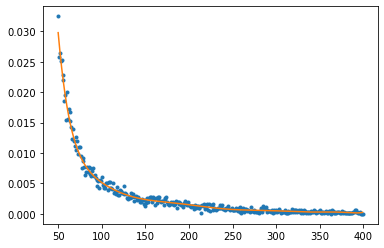

In [38]:

plt.plot(bins, entries_dy/10531, '.', bins, p_dy(bins), '-')


plt.show()

23502


(array([1.108e+03, 1.065e+03, 1.122e+03, 9.350e+02, 1.158e+03, 9.190e+02,
        8.870e+02, 8.960e+02, 7.660e+02, 6.740e+02, 7.310e+02, 6.000e+02,
        5.800e+02, 6.120e+02, 5.570e+02, 4.620e+02, 5.190e+02, 4.330e+02,
        4.840e+02, 4.120e+02, 4.200e+02, 3.610e+02, 4.310e+02, 3.350e+02,
        3.720e+02, 2.770e+02, 2.990e+02, 2.620e+02, 2.510e+02, 2.460e+02,
        2.310e+02, 2.720e+02, 2.120e+02, 2.000e+02, 2.190e+02, 1.800e+02,
        1.540e+02, 1.720e+02, 1.540e+02, 1.400e+02, 1.380e+02, 1.110e+02,
        1.170e+02, 1.220e+02, 1.100e+02, 1.070e+02, 9.800e+01, 9.900e+01,
        7.100e+01, 8.500e+01, 6.200e+01, 6.900e+01, 1.020e+02, 7.400e+01,
        6.900e+01, 8.600e+01, 6.900e+01, 7.200e+01, 5.800e+01, 5.000e+01,
        7.000e+01, 7.000e+01, 3.800e+01, 6.100e+01, 4.800e+01, 6.800e+01,
        7.400e+01, 3.500e+01, 4.200e+01, 4.000e+01, 4.400e+01, 3.500e+01,
        2.800e+01, 3.300e+01, 3.200e+01, 2.900e+01, 2.600e+01, 2.600e+01,
        1.500e+01, 2.200e+01, 2.900e+0

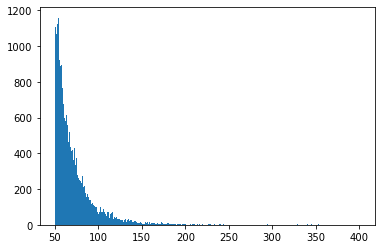

In [39]:
# # BKG DT

print(len(pu[(pu.Cluster_Size <= 400) & (pu.Cluster_Size >= 50)]["Cluster_Size"].values))

plt.hist(pu[(pu.Cluster_Size <= 400) & (pu.Cluster_Size >= 50)]["Cluster_Size"], bins=350)

In [40]:
entries_pu = np.array([1.108e+03, 1.065e+03, 1.122e+03, 9.350e+02, 1.158e+03, 9.190e+02,
        8.870e+02, 8.960e+02, 7.660e+02, 6.740e+02, 7.310e+02, 6.000e+02,
        5.800e+02, 6.120e+02, 5.570e+02, 4.620e+02, 5.190e+02, 4.330e+02,
        4.840e+02, 4.120e+02, 4.200e+02, 3.610e+02, 4.310e+02, 3.350e+02,
        3.720e+02, 2.770e+02, 2.990e+02, 2.620e+02, 2.510e+02, 2.460e+02,
        2.310e+02, 2.720e+02, 2.120e+02, 2.000e+02, 2.190e+02, 1.800e+02,
        1.540e+02, 1.720e+02, 1.540e+02, 1.400e+02, 1.380e+02, 1.110e+02,
        1.170e+02, 1.220e+02, 1.100e+02, 1.070e+02, 9.800e+01, 9.900e+01,
        7.100e+01, 8.500e+01, 6.200e+01, 6.900e+01, 1.020e+02, 7.400e+01,
        6.900e+01, 8.600e+01, 6.900e+01, 7.200e+01, 5.800e+01, 5.000e+01,
        7.000e+01, 7.000e+01, 3.800e+01, 6.100e+01, 4.800e+01, 6.800e+01,
        7.400e+01, 3.500e+01, 4.200e+01, 4.000e+01, 4.400e+01, 3.500e+01,
        2.800e+01, 3.300e+01, 3.200e+01, 2.900e+01, 2.600e+01, 2.600e+01,
        1.500e+01, 2.200e+01, 2.900e+01, 3.200e+01, 1.700e+01, 2.600e+01,
        3.200e+01, 1.900e+01, 2.800e+01, 2.800e+01, 2.800e+01, 1.700e+01,
        1.500e+01, 2.200e+01, 2.300e+01, 1.600e+01, 1.000e+01, 1.300e+01,
        8.000e+00, 1.200e+01, 1.400e+01, 1.200e+01, 7.000e+00, 6.000e+00,
        1.100e+01, 7.000e+00, 1.300e+01, 9.000e+00, 1.600e+01, 7.000e+00,
        1.300e+01, 4.000e+00, 3.000e+00, 1.000e+01, 8.000e+00, 1.100e+01,
        8.000e+00, 5.000e+00, 4.000e+00, 9.000e+00, 7.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 1.300e+01, 1.000e+01, 2.000e+00, 7.000e+00,
        6.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 8.000e+00, 7.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 7.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00])

In [41]:
bins = np.array(range(50,400,1))
#bins = np.delete(bins, -1)
#entries_DtBkg = np.delete(entries_DtBkg, -1)

p_pu = np.polyfit(bins, entries_pu/23502, 10)
p_pu = np.poly1d(p_pu)

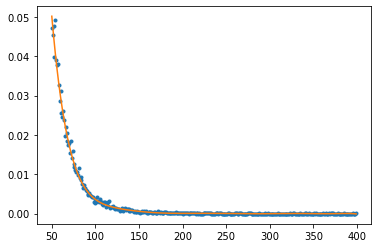

In [42]:

plt.plot(bins, entries_pu/23502, '.', bins, p_pu(bins), '-')


plt.show()

25093


(array([1.257e+03, 1.174e+03, 1.094e+03, 9.440e+02, 1.087e+03, 7.870e+02,
        7.080e+02, 8.420e+02, 6.880e+02, 5.700e+02, 6.550e+02, 5.490e+02,
        4.780e+02, 5.150e+02, 4.950e+02, 4.100e+02, 4.570e+02, 3.730e+02,
        3.610e+02, 3.930e+02, 3.530e+02, 3.160e+02, 3.520e+02, 2.560e+02,
        2.880e+02, 2.500e+02, 2.590e+02, 2.290e+02, 2.720e+02, 2.120e+02,
        2.440e+02, 2.080e+02, 1.980e+02, 1.890e+02, 1.830e+02, 1.460e+02,
        1.720e+02, 1.600e+02, 1.570e+02, 1.530e+02, 1.470e+02, 1.360e+02,
        1.250e+02, 1.360e+02, 1.310e+02, 1.320e+02, 1.460e+02, 1.090e+02,
        1.100e+02, 1.020e+02, 1.130e+02, 1.160e+02, 9.000e+01, 8.300e+01,
        1.030e+02, 1.040e+02, 8.300e+01, 9.500e+01, 1.060e+02, 9.400e+01,
        8.400e+01, 6.900e+01, 7.900e+01, 6.800e+01, 7.000e+01, 6.700e+01,
        6.100e+01, 6.900e+01, 5.200e+01, 6.500e+01, 5.900e+01, 4.900e+01,
        5.000e+01, 5.300e+01, 6.700e+01, 4.900e+01, 6.500e+01, 4.400e+01,
        5.300e+01, 5.600e+01, 3.800e+0

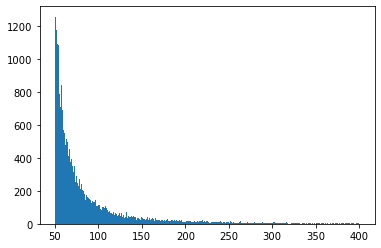

In [43]:
# # BKG DT

print(len(pions_kaons[(pions_kaons.Cluster_Size <= 400) & (pions_kaons.Cluster_Size >= 50)]["Cluster_Size"].values))

plt.hist(pions_kaons[(pions_kaons.Cluster_Size <= 400) & (pions_kaons.Cluster_Size >= 50)]["Cluster_Size"], bins=350)

In [44]:
entries_pions_kaons = np.array([1.257e+03, 1.174e+03, 1.094e+03, 9.440e+02, 1.087e+03, 7.870e+02,
        7.080e+02, 8.420e+02, 6.880e+02, 5.700e+02, 6.550e+02, 5.490e+02,
        4.780e+02, 5.150e+02, 4.950e+02, 4.100e+02, 4.570e+02, 3.730e+02,
        3.610e+02, 3.930e+02, 3.530e+02, 3.160e+02, 3.520e+02, 2.560e+02,
        2.880e+02, 2.500e+02, 2.590e+02, 2.290e+02, 2.720e+02, 2.120e+02,
        2.440e+02, 2.080e+02, 1.980e+02, 1.890e+02, 1.830e+02, 1.460e+02,
        1.720e+02, 1.600e+02, 1.570e+02, 1.530e+02, 1.470e+02, 1.360e+02,
        1.250e+02, 1.360e+02, 1.310e+02, 1.320e+02, 1.460e+02, 1.090e+02,
        1.100e+02, 1.020e+02, 1.130e+02, 1.160e+02, 9.000e+01, 8.300e+01,
        1.030e+02, 1.040e+02, 8.300e+01, 9.500e+01, 1.060e+02, 9.400e+01,
        8.400e+01, 6.900e+01, 7.900e+01, 6.800e+01, 7.000e+01, 6.700e+01,
        6.100e+01, 6.900e+01, 5.200e+01, 6.500e+01, 5.900e+01, 4.900e+01,
        5.000e+01, 5.300e+01, 6.700e+01, 4.900e+01, 6.500e+01, 4.400e+01,
        5.300e+01, 5.600e+01, 3.800e+01, 4.200e+01, 7.200e+01, 3.700e+01,
        4.600e+01, 4.400e+01, 4.100e+01, 3.500e+01, 4.900e+01, 3.900e+01,
        4.600e+01, 3.900e+01, 4.400e+01, 2.600e+01, 3.800e+01, 3.700e+01,
        3.600e+01, 2.900e+01, 2.600e+01, 4.100e+01, 3.500e+01, 3.100e+01,
        3.900e+01, 2.900e+01, 2.200e+01, 3.200e+01, 4.300e+01, 2.600e+01,
        3.500e+01, 2.200e+01, 4.000e+01, 3.000e+01, 3.800e+01, 3.000e+01,
        1.800e+01, 3.500e+01, 2.400e+01, 2.400e+01, 2.200e+01, 2.300e+01,
        2.400e+01, 1.600e+01, 2.400e+01, 2.100e+01, 1.600e+01, 2.000e+01,
        2.600e+01, 1.500e+01, 2.300e+01, 2.700e+01, 2.000e+01, 1.900e+01,
        1.800e+01, 1.900e+01, 2.400e+01, 2.500e+01, 1.400e+01, 2.100e+01,
        1.700e+01, 2.200e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.400e+01,
        1.500e+01, 2.200e+01, 1.300e+01, 1.300e+01, 1.800e+01, 1.300e+01,
        1.300e+01, 1.600e+01, 1.500e+01, 1.700e+01, 1.400e+01, 1.900e+01,
        1.500e+01, 1.100e+01, 1.200e+01, 1.100e+01, 1.400e+01, 1.300e+01,
        1.300e+01, 1.400e+01, 1.100e+01, 1.200e+01, 1.400e+01, 1.500e+01,
        1.800e+01, 2.100e+01, 1.300e+01, 1.200e+01, 1.900e+01, 9.000e+00,
        1.400e+01, 1.400e+01, 8.000e+00, 7.000e+00, 7.000e+00, 9.000e+00,
        1.200e+01, 1.000e+01, 9.000e+00, 1.200e+01, 1.300e+01, 9.000e+00,
        1.200e+01, 1.500e+01, 8.000e+00, 1.200e+01, 1.500e+01, 1.000e+01,
        7.000e+00, 1.000e+01, 1.200e+01, 1.000e+01, 4.000e+00, 1.000e+01,
        1.000e+01, 9.000e+00, 6.000e+00, 1.400e+01, 6.000e+00, 1.000e+01,
        7.000e+00, 1.000e+01, 6.000e+00, 6.000e+00, 6.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 8.000e+00, 1.400e+01, 6.000e+00, 5.000e+00,
        7.000e+00, 5.000e+00, 6.000e+00, 7.000e+00, 5.000e+00, 9.000e+00,
        6.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 2.000e+00,
        6.000e+00, 1.100e+01, 7.000e+00, 6.000e+00, 7.000e+00, 3.000e+00,
        6.000e+00, 7.000e+00, 7.000e+00, 3.000e+00, 8.000e+00, 4.000e+00,
        4.000e+00, 6.000e+00, 2.000e+00, 7.000e+00, 3.000e+00, 4.000e+00,
        7.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 4.000e+00, 8.000e+00,
        8.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 7.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00])

In [45]:
bins = np.array(range(50,400,1))
#bins = np.delete(bins, -1)
#entries_DtBkg = np.delete(entries_DtBkg, -1)

p_pions_kaons = np.polyfit(bins, entries_pions_kaons/25093, 10)
p_pions_kaons = np.poly1d(p_pions_kaons)

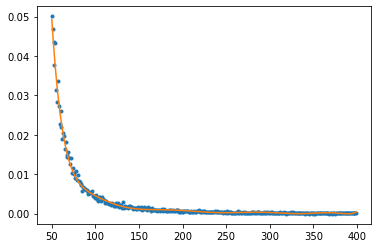

In [46]:

plt.plot(bins, entries_pions_kaons/25093, '.', bins, p_pions_kaons(bins), '-')


plt.show()

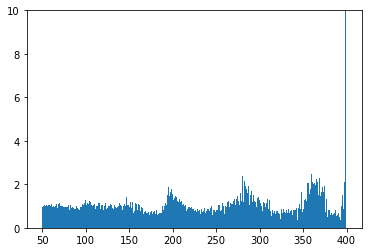

In [47]:
plt.hist(beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]["Cluster_Size"], bins=350, weights = 1/39720/p_beam_halo(beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]["Cluster_Size"]))

plt.ylim((0,10))
plt.show()

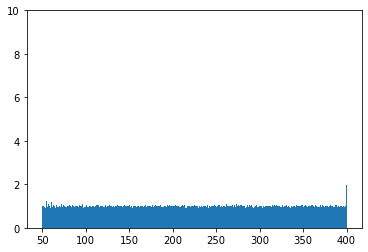

In [48]:
plt.hist(signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]["Cluster_Size"], bins=350, weights = 1/376009/p_signal(signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]["Cluster_Size"]))

plt.ylim((0,10))
plt.show()

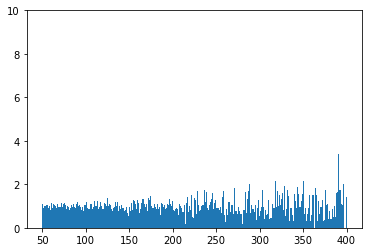

In [49]:
plt.hist(dy[(dy.Cluster_Size <= 400) & (dy.Cluster_Size >= 50)]["Cluster_Size"], bins=350, weights = 1/10531/p_dy(dy[(dy.Cluster_Size <= 400) & (dy.Cluster_Size >= 50)]["Cluster_Size"]))

plt.ylim((0,10))
plt.show()

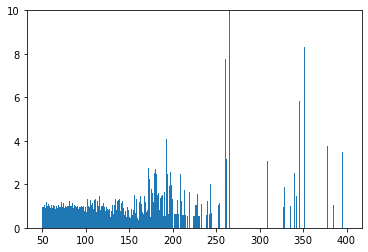

In [50]:
plt.hist(pu[(pu.Cluster_Size <= 400) & (pu.Cluster_Size >= 50)]["Cluster_Size"], bins=350, weights = 1/23532/p_pu(pu[(pu.Cluster_Size <= 400) & (pu.Cluster_Size >= 50)]["Cluster_Size"]))

plt.ylim((0,10))
plt.show()

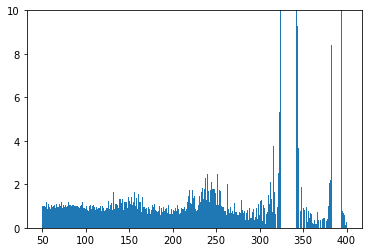

In [51]:
plt.hist(pions_kaons[(pions_kaons.Cluster_Size <= 400) & (pions_kaons.Cluster_Size >= 50)]["Cluster_Size"], bins=350, weights = 1/25093/p_pions_kaons(pions_kaons[(pions_kaons.Cluster_Size <= 400) & (pions_kaons.Cluster_Size >= 50)]["Cluster_Size"]))

plt.ylim((0,10))
plt.show()

In [52]:
# adding beam_halo

signal = signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]
signal['weight'] = 4/376009/p_signal(signal["Cluster_Size"])

signal_dataTraining = signal[(signal.Cluster_Size <= 400) & (signal.Cluster_Size >= 50)]
signal_dataTraining['weight'] = 1/376009/p_signal(signal["Cluster_Size"])

pu = pu[(pu.Cluster_Size <= 400) & (pu.Cluster_Size >= 50)]
pu['weight'] = 1/23532/p_pu(pu["Cluster_Size"])

dy = dy[(dy.Cluster_Size <= 400) & (dy.Cluster_Size >= 50)]
dy['weight'] = 1/10531/p_dy(dy["Cluster_Size"])

pions_kaons = pions_kaons[(pions_kaons.Cluster_Size <= 400) & (pions_kaons.Cluster_Size >= 50)]
pions_kaons['weight'] = 1/25093/p_pions_kaons(pions_kaons["Cluster_Size"])

beam_halo = beam_halo[(beam_halo.Cluster_Size <= 400) & (beam_halo.Cluster_Size >= 50)]
beam_halo['weight'] = 1/39720/p_beam_halo(beam_halo["Cluster_Size"])

test = test[(test.Cluster_Size <= 400) & (test.Cluster_Size >= 50)]
test['weight'] = 1/283808/p_test(test["Cluster_Size"])

In [53]:
signal['y'] = 1
signal_dataTraining['y'] = 1

pu['y'] = 0
dy['y'] = 0
pions_kaons['y'] = 0
beam_halo['y'] = 0
test['y'] = 0

In [54]:
# save data:
variablesTrain = ['Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', \
                  'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', \
                  'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'y', 'weight']

signal[variablesTrain].to_csv('signal_CSCOnly_240510.csv')  
pu[variablesTrain].to_csv('pu_CSCOnly_240510.csv')  
dy[variablesTrain].to_csv('dy_CSCOnly_240510.csv')  
pions_kaons[variablesTrain].to_csv('pions_kaons_CSCOnly_240510.csv')  
beam_halo[variablesTrain].to_csv('beam_halo_CSCOnly_240510.csv')  

signal_dataTraining.to_csv('signal_CSCOnly_240510_forDataTraining.csv')  
test.to_csv('OOTdata_CSCOnly_240510_forDataTraining.csv')  

In [55]:
signal.weight

5          0.002090
6          0.005323
11         0.004396
31         0.004323
33         0.003786
             ...   
1956476    0.005863
1956477    0.005240
1956478    0.002565
1956480    0.003756
1956482    0.002410
Name: weight, Length: 376009, dtype: float64

In [56]:
pu.weight

565        0.000892
626        0.022446
799        0.002455
813        0.001156
944        0.028516
             ...   
3332298    0.000892
3332540    0.001097
3332818    0.002084
3332832    0.003229
3332946    0.003229
Name: weight, Length: 23502, dtype: float64

In [57]:
dy.weight

272        0.020646
585        0.003954
1020       0.004387
1273       0.049523
1589       0.009883
             ...   
1963182    0.003368
1963447    0.020264
1963452    0.015618
1963552    0.005881
1963652    0.028781
Name: weight, Length: 10531, dtype: float64